In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
combats_expanded = pd.read_csv('combats_expanded.csv')
pokemon_clean = pd.read_csv('pokemon_clean.csv')
tests = pd.read_csv('tests.csv')


pokemon_clean.head()

,Unnamed: 0,Index,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Legendary,Win Num,Match Num,Win Ratio,Has 2 Types,normal_stats,special_stats,total_stats,Sum of Attack,Sum of Defense
0,0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,...,False,37.0,133,0.278195,True,188,130,318,114,114
1,1,2,Ivysaur,Grass,Poison,60,62,63,80,80,...,False,46.0,121,0.380165,True,245,160,405,142,143
2,2,3,Venusaur,Grass,Poison,80,82,83,100,100,...,False,89.0,132,0.674242,True,325,200,525,182,183
3,3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,...,False,70.0,125,0.560000,True,383,242,625,222,243
4,4,5,Charmander,Fire,NaN,39,52,43,60,50,...,False,55.0,112,0.491071,False,199,110,309,112,93


In [3]:
# Add whether First or Second Pokémon is Legendary
combats_expanded['Legendary Winner'] = combats_expanded['Winner'].map(pokemon_clean.set_index('Index')['Legendary'])
combats_expanded['Legendary Loser'] = combats_expanded['Loser'].map(pokemon_clean.set_index('Index')['Legendary'])

combats_expanded.head()

,Unnamed: 0,First_pokemon,Second_pokemon,Winner,Has First Won,Loser,Type 1 Winner,Type 2 Winner,Type 1 Loser,Type 2 Loser,...,Attack_diff,Sp. Atk_diff,Speed_diff,Defense_diff,Sp. Def_diff,HP_diff,Sum of Attack_diff,Sum of Defense_diff,Legendary Winner,Legendary Loser
0,0,266,298,298,False,266,Grass,Dark,Rock,Ground,...,6,15,19,-10,-10,20,21,-20,False,False
1,1,702,701,701,False,702,Rock,Fighting,Grass,Fighting,...,39,-18,0,18,-39,0,21,-21,True,True
2,2,191,668,668,False,191,Psychic,NaN,Fairy,Flying,...,35,45,0,-10,-10,20,80,-20,False,False
3,3,237,683,683,False,237,Dragon,NaN,Fire,NaN,...,80,-10,28,50,50,37,70,100,False,False
4,4,151,231,151,True,231,Rock,Water,Bug,Rock,...,50,105,50,-105,-160,50,155,-265,False,False


In [4]:
# Drop unnecessary columns
combats_expanded = combats_expanded.drop(columns=['Unnamed: 0'])
combats_expanded.head()

,First_pokemon,Second_pokemon,Winner,Has First Won,Loser,Type 1 Winner,Type 2 Winner,Type 1 Loser,Type 2 Loser,total_stats_diff,Attack_diff,Sp. Atk_diff,Speed_diff,Defense_diff,Sp. Def_diff,HP_diff,Sum of Attack_diff,Sum of Defense_diff,Legendary Winner,Legendary Loser
0,266,298,298,False,266,Grass,Dark,Rock,Ground,40,6,15,19,-10,-10,20,21,-20,False,False
1,702,701,701,False,702,Rock,Fighting,Grass,Fighting,0,39,-18,0,18,-39,0,21,-21,True,True
2,191,668,668,False,191,Psychic,NaN,Fairy,Flying,80,35,45,0,-10,-10,20,80,-20,False,False
3,237,683,683,False,237,Dragon,NaN,Fire,NaN,235,80,-10,28,50,50,37,70,100,False,False
4,151,231,151,True,231,Rock,Water,Bug,Rock,-10,50,105,50,-105,-160,50,155,-265,False,False


In [5]:
combats_decision_tree = combats_expanded[['First_pokemon','Second_pokemon','Has First Won']]
combats_decision_tree['First_pokemon_legendary'] = combats_decision_tree['First_pokemon'].map(pokemon_clean.set_index('Index')['Legendary'])
combats_decision_tree['Second_pokemon_legendary'] = combats_decision_tree['Second_pokemon'].map(pokemon_clean.set_index('Index')['Legendary'])

# Creating feature columns for combats

columns_to_difference = ['total_stats', 'Speed', 'HP', 'Sum of Attack', 'Sum of Defense']
for column in columns_to_difference:
    combats_decision_tree[column + '_diff'] = combats_expanded['First_pokemon'].map(pokemon_clean.set_index('Index')[column]) - combats_expanded['Second_pokemon'].map(pokemon_clean.set_index('Index')[column])

combats_decision_tree.head()


C:\Users\magda\AppData\Local\Temp\ipykernel_6816\3703714410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combats_decision_tree['First_pokemon_legendary'] = combats_decision_tree['First_pokemon'].map(pokemon_clean.set_index('Index')['Legendary'])
C:\Users\magda\AppData\Local\Temp\ipykernel_6816\3703714410.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combats_decision_tree['Second_pokemon_legendary'] = combats_decision_tree['Second_pokemon'].map(pokemon_clean.set_index('Index')['Legendary'])
C:\U

,First_pokemon,Second_pokemon,Has First Won,First_pokemon_legendary,Second_pokemon_legendary,total_stats_diff,Speed_diff,HP_diff,Sum of Attack_diff,Sum of Defense_diff
0,266,298,False,False,False,-40,-19,-20,-21,20
1,702,701,False,True,True,0,0,0,-21,21
2,191,668,False,False,False,-80,0,-20,-80,20
3,237,683,False,False,False,-235,-28,-37,-70,-100
4,151,231,True,False,False,-10,50,50,155,-265


In [6]:
columns_to_int = ['First_pokemon_legendary', 'Second_pokemon_legendary', 'Has First Won']
for column in columns_to_int:
    combats_decision_tree[column] = combats_decision_tree[column].astype(int)

combats_decision_tree.head()

C:\Users\magda\AppData\Local\Temp\ipykernel_6816\2854619816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combats_decision_tree[column] = combats_decision_tree[column].astype(int)
C:\Users\magda\AppData\Local\Temp\ipykernel_6816\2854619816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combats_decision_tree[column] = combats_decision_tree[column].astype(int)
C:\Users\magda\AppData\Local\Temp\ipykernel_6816\2854619816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,First_pokemon,Second_pokemon,Has First Won,First_pokemon_legendary,Second_pokemon_legendary,total_stats_diff,Speed_diff,HP_diff,Sum of Attack_diff,Sum of Defense_diff
0,266,298,0,0,0,-40,-19,-20,-21,20
1,702,701,0,1,1,0,0,0,-21,21
2,191,668,0,0,0,-80,0,-20,-80,20
3,237,683,0,0,0,-235,-28,-37,-70,-100
4,151,231,1,0,0,-10,50,50,155,-265


Stats differences are defined as first minus second, because the evaluation comes down to whether the first pokemon has won

In [7]:
X = combats_decision_tree[['First_pokemon_legendary', 'Second_pokemon_legendary', 'total_stats_diff', 'Speed_diff', 'HP_diff', 'Sum of Attack_diff', 'Sum of Defense_diff']]
y = combats_decision_tree['Has First Won']

Firstly, let's try with the simplest decision tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the test set labels
y_pred = dt.predict(X_test)

# Evaluate the test-set accuracy
accuracy_score(y_test, y_pred)

0.9004

In [9]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(dt, X_train, y_train, cv=10, n_jobs = -1)

y_predict_train = dt.predict(X_train)

print('CV mean: ', cv_score.mean())
print('CV std: ', cv_score.std())

CV mean:  0.9058249999999999
CV std:  0.005007556789493247


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

lr = LogisticRegression(random_state=1)
knn = KNN()
dt = DecisionTreeClassifier(random_state=1)

# List of classifiers that contains the tuples
classifiers = [('Logistic Regression', lr),
              ('K Nearest Neighbours', knn),
              ('Classification Tree', dt)]

# Iterate over classifiers
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('{:s} : : {:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

vc = VotingClassifier(estimators=classifiers)

vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regression : : 0.896
K Nearest Neighbours : : 0.906
Classification Tree : : 0.904
Voting Classifier: 0.923


In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

dt = DecisionTreeClassifier(random_state=1)

bc = BaggingClassifier(dt, n_estimators=300, n_jobs=-1)

bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)

# Cross-validation
cv_score = cross_val_score(bc, X_train, y_train, cv=10, n_jobs = -1)

y_predict_train = bc.predict(X_train)

print('Bagging Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('CV mean: ', cv_score.mean())
print('CV std: ', cv_score.std())

Bagging Classifier: 0.943
CV mean:  0.9442857142857142
CV std:  0.0026649654437396588


In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

dt = DecisionTreeClassifier(random_state=1)

bg = BaggingClassifier(dt, n_estimators=300, oob_score=True, n_jobs=-1)

bg.fit(X_train, y_train)

y_pred = bg.predict(X_test)

# Cross-validation
cv_score = cross_val_score(bg, X_train, y_train, cv=10, n_jobs = -1)

y_predict_train = bg.predict(X_train)

print('Bagging Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('OBB accuracy: {:.3f}'.format(bg.oob_score_))
print('CV mean: ', cv_score.mean())
print('CV std: ', cv_score.std())

Bagging Classifier: 0.941
OBB accuracy: 0.945
CV mean:  0.9443714285714286
CV std:  0.003803435611257222


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

rf = RandomForestClassifier(n_estimators=400, random_state=1)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Cross-validation
cv_score = cross_val_score(rf, X_train, y_train, cv=10, n_jobs = -1)

y_predict_train = rf.predict(X_train)

print('The accuracy score: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('CV mean: ', cv_score.mean())
print('CV std: ', cv_score.std())
print('Forest hyperparameters: \n', rf.get_params())

The accuracy score: 0.945
CV mean:  0.9451714285714286
CV std:  0.002835489375751575
Forest hyperparameters: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


<Axes: >

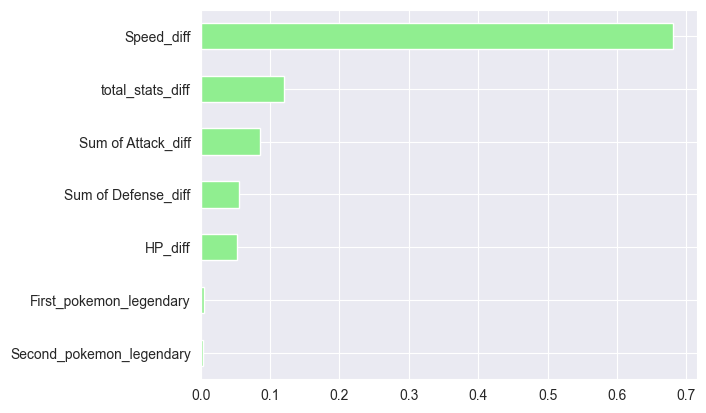

In [14]:
# Feature importance
import pandas as pd
import matplotlib as plt

# Create a pd Series of feature importances
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)

# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# Horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='lightgreen')

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

dt = DecisionTreeClassifier(max_depth=1, random_state=1)

ada_clf = AdaBoostClassifier(dt, n_estimators=100)

ada_clf.fit(X_train, y_train)

# Predict the test set probabilities of positive class
y_pred_proba = ada_clf.predict_proba(X_test)[:,1]

# Evaluate test-set roc-auc_score
ada_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
ada_clf_accuracy_score = accuracy_score(y_test, y_pred)

cv_score = cross_val_score(ada_clf, X_train, y_train, cv=10, n_jobs = -1)

y_predict_train = ada_clf.predict(X_train)

print('The roc_auc_score test score: {:.3f}'.format(ada_clf_roc_auc_score))
print('Accuracy score: {:.3f}'.format(ada_clf_accuracy_score))
print('CV mean: ', cv_score.mean())
print('CV std: ', cv_score.std())

The roc_auc_score test score: 0.967
Accuracy score: 0.945
CV mean:  0.9414857142857143
CV std:  0.003134534434720573


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

gbt = GradientBoostingClassifier(n_estimators=100, random_state=1)

gbt.fit(X_train, y_train)

y_pred = gbt.predict(X_test)

cv_score = cross_val_score(gbt, X_train, y_train, cv=10, n_jobs = -1)

y_predict_train = gbt.predict(X_train)

print('The accuracy score: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('CV mean: ', cv_score.mean())
print('CV std: ', cv_score.std())

The accuracy score: 0.941
CV mean:  0.943
CV std:  0.0034528899460585017


In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

sgbt = GradientBoostingClassifier(n_estimators=100,subsample=0.8, max_features=0.2, random_state=1)

sgbt.fit(X_train, y_train)

y_pred = sgbt.predict(X_test)

# Cross-validation
cv_score = cross_val_score(sgbt, X_train, y_train, cv=10, n_jobs = -1)

y_predict_train = sgbt.predict(X_train)

print('The accuracy score: {:.3f}'.format(accuracy_score(y_test, y_pred)))
print('CV mean: ', cv_score.mean())
print('CV std: ', cv_score.std())

The accuracy score: 0.939
CV mean:  0.9418000000000001
CV std:  0.0033467620660170123


In [18]:
# Grid search
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

params_dt = {'max_depth':[2,3,4,5],
            'min_samples_leaf':[0.01,0.02,0.04,0.06],
            'max_features':[0.4,0.6,0.8]}

grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, scoring='accuracy', cv=10, n_jobs=-1)

grid_dt.fit(X_train, y_train)

best_hyperparams = grid_dt.best_params_
best_CV_score = grid_dt.best_score_

print('Best hyperparams: ', best_hyperparams)
print('Best accuracy: ', best_CV_score)

# Extract the model
best_model = grid_dt.best_estimator_

test_acc = best_model.score(X_test, y_test)
print('Test accuracy: {:.3f}'.format(test_acc))

Best hyperparams:  {'max_depth': 2, 'max_features': 0.6, 'min_samples_leaf': 0.01}
Best accuracy:  0.94085
Test accuracy: 0.939


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(random_state=1, oob_score=True)

print(rf.get_params())

param_grid = {
  'n_estimators': [400],
  'max_depth': [None, 2,3],
  #'max_features': ['sqrt','log2', 0.2,0.5,0.8],
  #'min_samples_split': [2,5,10],
  #'min_samples_leaf': [1,2,5,10],
  'criterion': ['gini','entropy'],
  'ccp_alpha': [0.0,1e-4,1e-3,1e-2],
  'class_weight': [None, 'balanced']
}

grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)


grid_rf.fit(X_train, y_train)

best_hyperparams = grid_rf.best_params_
best_CV_score = grid_rf.best_score_

print('Best hyperparams: ', best_hyperparams)
print('Best accuracy: ', best_CV_score)

best_model = grid_rf.best_estimator_

y_pred = best_model.predict(X_test)

best_model_acc = accuracy_score(y_test, y_pred)
test_acc = best_model.score(X_test, y_test)

print('Best model accuracy: {:.4f}'.format(best_model_acc))
print('Test accuracy: {:.4f}'.format(test_acc))

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': True, 'random_state': 1, 'verbose': 0, 'warm_start': False}
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best hyperparams:  {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'n_estimators': 400}
Best accuracy:  0.9453999999999999
Best model accuracy: 0.9440
Test accuracy: 0.9440


In [28]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Ponownie dzielimy dane (dla pewności)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

# Najlepsze modele
rf_best = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    criterion='entropy',
    class_weight='balanced',
    ccp_alpha=0.0,
    random_state=1,
    oob_score=True
)

dt_base = DecisionTreeClassifier(random_state=1)
bag_best = BaggingClassifier(dt_base, n_estimators=300, n_jobs=-1, random_state=1)

gb_best = GradientBoostingClassifier(n_estimators=100, random_state=1)

# VotingClassifier (głosowanie większościowe)
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_best),
    ('bag', bag_best),
    ('gb', gb_best)
], voting='hard', n_jobs=-1)

# Dopasowanie modelu
voting_clf.fit(X_train, y_train)

# Ewaluacja
y_pred = voting_clf.predict(X_test)
voting_acc = accuracy_score(y_test, y_pred)
print(f'🔮 VotingClassifier test accuracy: {voting_acc:.4f}')

# Cross-validation
cv_score = cross_val_score(voting_clf, X_train, y_train, cv=10, n_jobs = -1)

y_predict_train = voting_clf.predict(X_train)

print('The accuracy score: {:.4f}'.format(accuracy_score(y_train, y_predict_train)))
print('CV mean: ', cv_score.mean())
print('CV std: ', cv_score.std())


🔮 VotingClassifier test accuracy: 0.9447
The accuracy score: 0.9995
CV mean:  0.945342857142857
CV std:  0.0028800510199562465


Best model: Tuned Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

rf = RandomForestClassifier(random_state=1, class_weight='balanced', criterion='entropy', n_jobs=-1, n_estimators=400)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Cross-validation
cv_score = cross_val_score(rf, X_train, y_train, cv=10, n_jobs = -1)

y_predict_train = rf.predict(X_train)

print('The accuracy score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('CV mean: ', cv_score.mean())
print('CV std: ', cv_score.std())
print('Forest hyperparameters: \n', rf.get_params())

The accuracy score: 0.944
CV mean:  0.9454
CV std:  0.0029704668773423335
Forest hyperparameters: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 400, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
